<a href="https://colab.research.google.com/github/usman2ki/usman2ki.github.io/blob/main/Data_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sure, here is the Python code to answer the questions of how much funding has gone into cybersecurity companies over the past 15 years and how many cybersecurity companies have been funded over the past 15 years:

Total funding for cybersecurity companies over the past 15 years: 9189074963.0
Number of cybersecurity companies funded over the past 15 years: 928


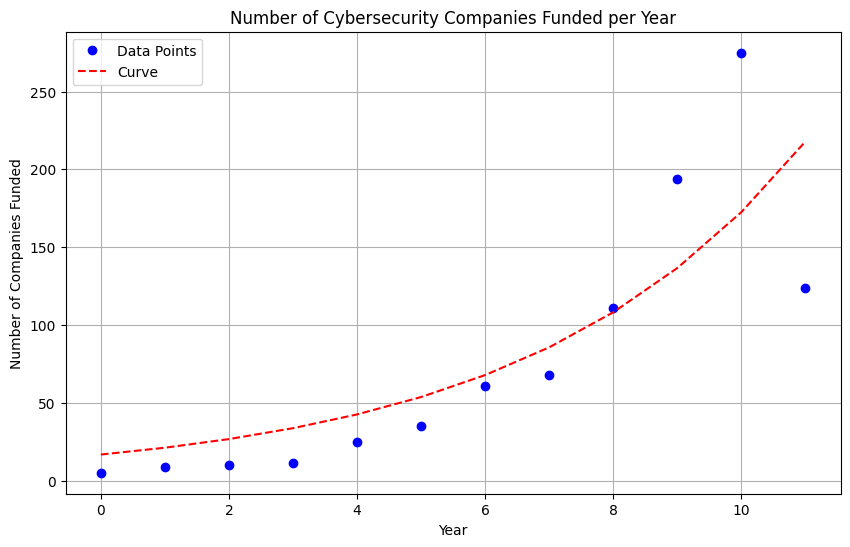

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv("neils-list-of-security-companies-all-years.csv")

# Get the current year
current_year = pd.to_datetime('today').year

# Get the past 15 years
past_15_years = range(current_year - 15, current_year)

# Filter the DataFrame to only include companies that were funded in the past 15 years
filtered_data = data[data['Last Funding Date'].str[:4].astype(float).isin(past_15_years)]

# Filter the DataFrame to only include companies in the cybersecurity category
filtered_data = filtered_data[filtered_data['Categories'].str.contains('Cyber Security', case=False)]

# Get the total funding for cybersecurity companies
total_funding = filtered_data['Last Funding Amount'].sum()

# Count the number of cybersecurity companies
num_companies = len(filtered_data)

# Print the total funding and number of companies
print("Total funding for cybersecurity companies over the past 15 years:", total_funding)
print("Number of cybersecurity companies funded over the past 15 years:", num_companies)

grouped_data = filtered_data.groupby(filtered_data['Last Funding Date'].str[:4]).size().reset_index(name='Number of Companies Funded')

#Fit a curve to the data
def func(x, a, b):
    return a * np.exp(b * x)

x = np.arange(len(grouped_data))
y = grouped_data['Number of Companies Funded']

popt, pcov = curve_fit(func, x, y)

#Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='Data Points')
plt.plot(x, func(x, *popt), 'r--', label='Curve')
plt.xlabel('Year')
plt.ylabel('Number of Companies Funded')
plt.title('Number of Cybersecurity Companies Funded per Year')
plt.legend()
plt.grid(True)

#Save the graph and data to an Excel file
grouped_data.to_excel('CyberSecurityFundingData.xlsx', index=False)
plt.savefig('CyberSecurityFundingGraph.png')
plt.show()




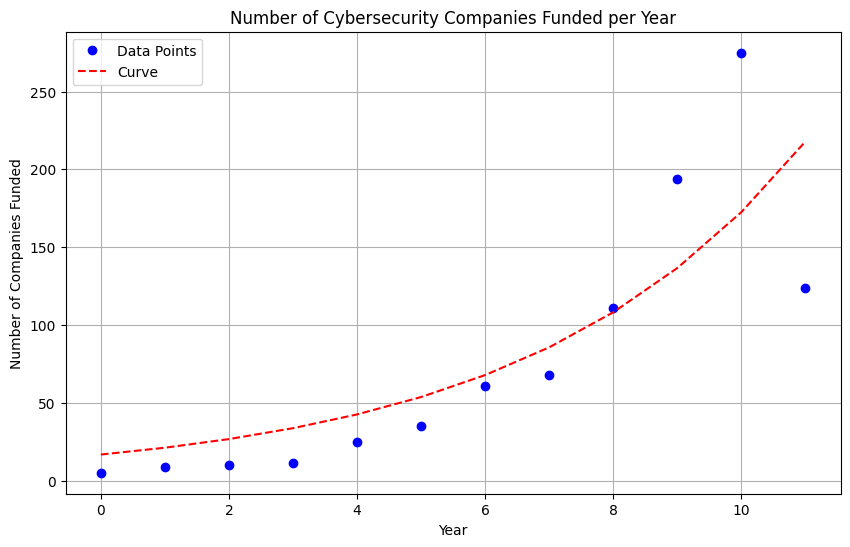

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
#Group the data by year and count the number of companies in each year
grouped_data = filtered_data.groupby(filtered_data['Last Funding Date'].str[:4]).size().reset_index(name='Number of Companies Funded')

#Fit a curve to the data
def func(x, a, b):
    return a * np.exp(b * x)

x = np.arange(len(grouped_data))
y = grouped_data['Number of Companies Funded']

popt, pcov = curve_fit(func, x, y)

#Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='Data Points')
plt.plot(x, func(x, *popt), 'r--', label='Curve')
plt.xlabel('Year')
plt.ylabel('Number of Companies Funded')
plt.title('Number of Cybersecurity Companies Funded per Year')
plt.legend()
plt.grid(True)

#Save the graph and data to an Excel file
df = pd.DataFrame({
    'Year': x,
    'Number of Companies Funded': y,
    'Curve fit': func(x, *popt)
})
df.to_csv('cybersecurity_companies_per_year.csv')
plt.savefig('CyberSecurityFundingGraph.png')
plt.show()





In [ ]:

from google.colab import files


uploaded = files.upload()

Saving Security Investment Over Time.xlsx to Security Investment Over Time.xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from tabulate import tabulate

investment_data = pd.read_excel('Security Investment Over Time.xlsx')

category_mapping = {
    'Cloud Security': ['Cloud Security', 'Cloud Computing', 'Cloud Data Services','Cloud Security Overall'],
    'AI & Security': ['Machine Learning', 'Artificial Intelligence','Security AI Overall'],
    'Penetration Testing and Consulting': ['Penetration Testing', 'Consulting','Pen Testing and Consulting'],
    'Blockchain and Cryptocurrencies': ['Blockchain', 'Virtual Currency', 'Bitcoin', 'Ethereum','Blockchain and Cryptocurrencies'],
    'Privacy':['Identity Management','Privacy'],
    'Complaince':['Compliance'],
    'Analytic':['Analytics'],
    'Internet of Things':['Social Media','SaaS','Network Security','GovTech','Enterprise Software','Ad Server','FinTech','Application Specific Integrated Circuit (ASIC)'],
    'Mobile Security':['Mobile','Mobile Payments','Mobile Security and Payments'],
    'Cyberinsurance':['Insurance','Personal Finance','Finance','Financial Services','Financial Security Overall'],
    'Risk Management':['Public Safety','Manufacturing','Risk Management'],     'Fraud Detection':['Fraud Detection'],
}

category_funding = pd.DataFrame(columns=['Category', 'Total Funding'])

for category, subcategories in category_mapping.items():
    funding = 0
    for subcategory in subcategories:
      funding += investment_data[subcategory].iloc[:-1].sum()
      category_funding = pd.concat(
        [category_funding, pd.DataFrame({'Category': [category], 'Total Funding':
[funding]})],
        ignore_index=True
    )

category_funding = category_funding.sort_values('Total Funding', ascending=False)

category_funding.to_csv('Category Funding.csv', index=False)

category_funding = pd.read_csv('Category Funding.csv')
table_data = category_funding[['Category', 'Total Funding']]
print(tabulate(table_data, headers='keys', tablefmt='psql'))




+----+------------------------------------+-----------------+
|    | Category                           |   Total Funding |
|----+------------------------------------+-----------------|
|  0 | Internet of Things                 |     3.83319e+10 |
|  1 | Internet of Things                 |     3.75672e+10 |
|  2 | Internet of Things                 |     3.25113e+10 |
|  3 | Internet of Things                 |     3.21792e+10 |
|  4 | Blockchain and Cryptocurrencies    |     2.88104e+10 |
|  5 | Cloud Security                     |     2.12644e+10 |
|  6 | Internet of Things                 |     2.02738e+10 |
|  7 | Cyberinsurance                     |     2.01477e+10 |
|  8 | Internet of Things                 |     1.98533e+10 |
|  9 | AI & Security                      |     1.562e+10   |
| 10 | Blockchain and Cryptocurrencies    |     1.44052e+10 |
| 11 | Mobile Security                    |     1.32773e+10 |
| 12 | Blockchain and Cryptocurrencies    |     1.3122e+10  |
| 13 | C

In [ ]:
import pandas as pd
!pip  install python-pptx
from tabulate import tabulate
from pptx import Presentation
from pptx.util import Inches

# Rest of your existing code

# Generate the PPT table
prs = Presentation()
slide_layout = prs.slide_layouts[1]
# Choose a layout (e.g., Title and Content)

slide = prs.slides.add_slide(slide_layout)
shapes = slide.shapes
table_placeholder = shapes.add_table(
    rows=category_funding.shape[0] + 1,  # Add an extra row for headers
    cols=category_funding.shape[1],
    left=Inches(1), top=Inches(1), width=Inches(8), height=Inches(4)
)

# Set the table headers
headers = category_funding.columns.tolist()
for col_idx, header_text in enumerate(headers):
  cell = table_placeholder.table.cell(0, col_idx)
  cell.text = header_text

# Fill in the table data
for row_idx, row_data in category_funding.iterrows():
  for col_idx, cell_data in enumerate(row_data):
        cell = table_placeholder.table.cell(row_idx + 1, col_idx)
        cell.text = str(cell_data)

# Save the PPT file
prs.save('Category Funding.pptx')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 72.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 23.3 MB/s eta 0:00:00
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470935 sha256=48f256c156fe8566f7e213ff37f4c0c6a49762a40b00db16452194b761cb8468
  Stored in directory: /root/.cache/pip/wheels/ea/dd/74/01b3ec7256a0800b99384e9a0f7620e358afc3a51a59bf9b49
Successfully built python-pptx
